# WATER QUALITY ANALYSIS
## Phase 2 - ANOMALY DETECTION TECHNIQUES

### Importing the necessary packages

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

### Reading the dataset

In [91]:
data=pd.read_csv("C:\\water_potability.csv")

## Data Preprocessing

In [92]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [93]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [94]:
data.shape

(3276, 10)

## Indexing

In [95]:
data.iloc[0]

ph                          NaN
Hardness             204.890455
Solids             20791.318981
Chloramines            7.300212
Sulfate              368.516441
Conductivity         564.308654
Organic_carbon        10.379783
Trihalomethanes       86.990970
Turbidity              2.963135
Potability             0.000000
Name: 0, dtype: float64

In [96]:
data.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [97]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [98]:
data.fillna(0, inplace=True)

In [99]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [100]:
data.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,False,False,False,False,False,False
3273,False,False,False,False,False,False,False,False,False,False
3274,False,False,False,False,False,False,False,False,False,False


In [101]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,6.019540,196.369496,22014.092526,7.122277,254.203468,426.205111,14.284970,63.112960,3.966786,0.390110
std,2.924207,32.879761,8768.570828,1.583085,146.765192,80.824064,3.308162,21.353531,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,0.000000,181.483754,2.200000,0.000000,1.450000,0.000000
25%,5.283146,176.850538,15666.690297,6.127421,240.722848,365.734414,12.065801,53.793688,3.439711,0.000000
50%,6.735249,196.967627,20927.833607,7.130299,318.660382,421.884968,14.218338,65.445962,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Frequency Distribution

In [102]:
data['Hardness'].value_counts()

204.890455    1
134.560276    1
170.190912    1
237.461099    1
171.238926    1
             ..
218.237186    1
208.374188    1
142.145566    1
179.799917    1
195.102299    1
Name: Hardness, Length: 3276, dtype: int64

In [103]:
data['ph'].value_counts()

0.000000    492
8.554097      1
6.538084      1
5.915807      1
8.136498      1
           ... 
4.187491      1
7.808012      1
5.895949      1
7.269652      1
7.874671      1
Name: ph, Length: 2785, dtype: int64

In [104]:
data['Solids'].value_counts()

20791.318981    1
15979.334793    1
37000.955674    1
18736.190902    1
12289.900922    1
               ..
22824.699465    1
21809.709834    1
45141.686036    1
17037.725367    1
17404.177061    1
Name: Solids, Length: 3276, dtype: int64

In [105]:
data['Sulfate'].value_counts()

0.000000      781
280.745623      1
332.744519      1
391.918229      1
330.905370      1
             ... 
343.620823      1
359.710517      1
389.219586      1
337.231469      1
359.948574      1
Name: Sulfate, Length: 2496, dtype: int64

In [106]:
data['Chloramines'].value_counts()

7.300212     1
9.504361     1
6.217223     1
5.599870     1
10.786500    1
            ..
8.696479     1
5.846112     1
6.030640     1
6.378364     1
7.509306     1
Name: Chloramines, Length: 3276, dtype: int64

In [107]:
data['Organic_carbon'].value_counts()

10.379783    1
12.897635    1
15.871770    1
11.545477    1
12.284334    1
            ..
15.310631    1
11.235144    1
20.605552    1
12.092499    1
16.140368    1
Name: Organic_carbon, Length: 3276, dtype: int64

## Slicing

In [108]:
data[10:15]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
10,7.360640,165.520797,32452.614409,7.550701,326.624353,425.383419,15.586810,78.740016,3.662292,0
11,7.974522,218.693300,18767.656682,8.110385,0.000000,364.098230,14.525746,76.485911,4.011718,0
12,7.119824,156.704993,18730.813653,3.606036,282.344050,347.715027,15.929536,79.500778,3.445756,0
13,0.000000,150.174923,27331.361962,6.838223,299.415781,379.761835,19.370807,76.509996,4.413974,0
14,7.496232,205.344982,28388.004887,5.072558,0.000000,444.645352,13.228311,70.300213,4.777382,0


In [109]:
data.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64

## Visualisation for Anomaly detection

### 1) Box Plots

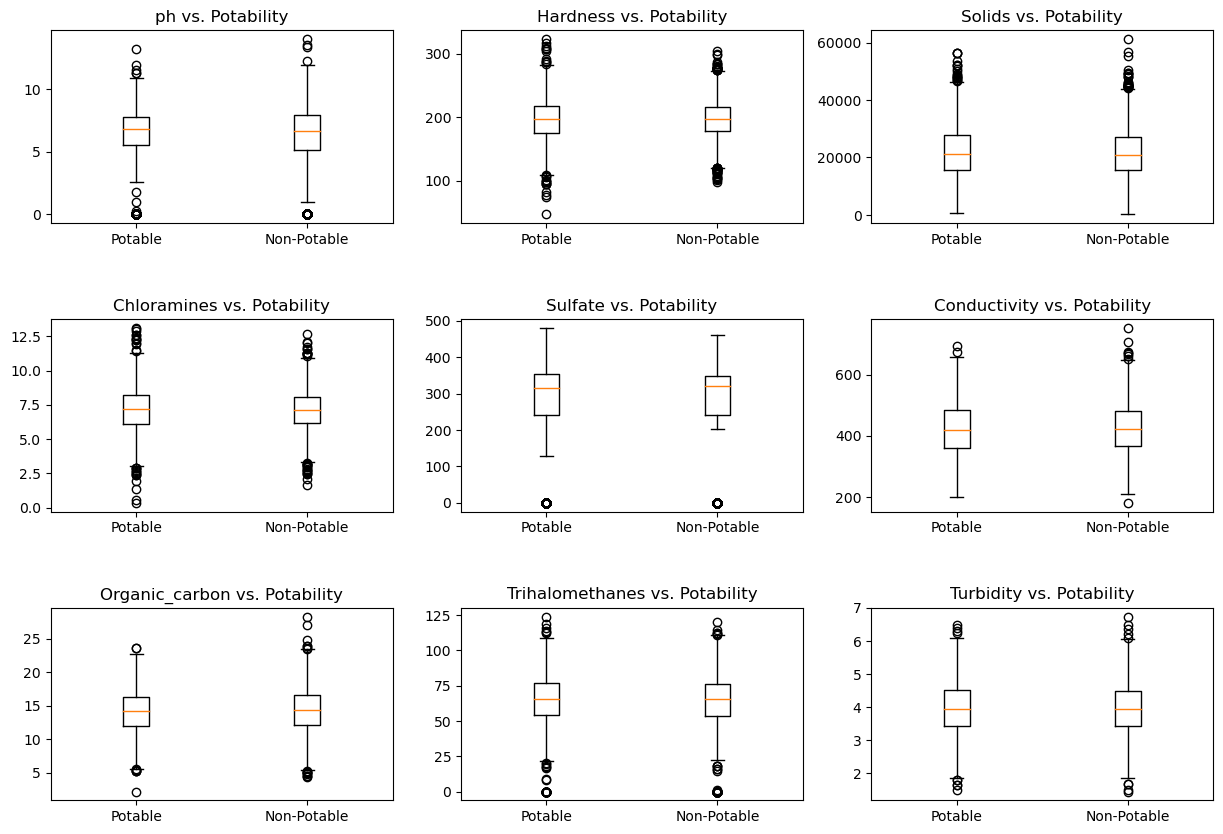

In [112]:
# Create separate DataFrames for potable and non-potable water
potable_data = data[data['Potability'] == 1]
non_potable_data = data[data['Potability'] == 0]

# Select the columns representing water quality parameters
water_quality_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create subplots for each parameter
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(water_quality_columns):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    
    # Create box plots for each parameter for potable and non-potable water
    ax.boxplot([potable_data[column], non_potable_data[column]], labels=['Potable', 'Non-Potable'])
    ax.set_title(f'{column} vs. Potability')

plt.show()


### 2) z-scores

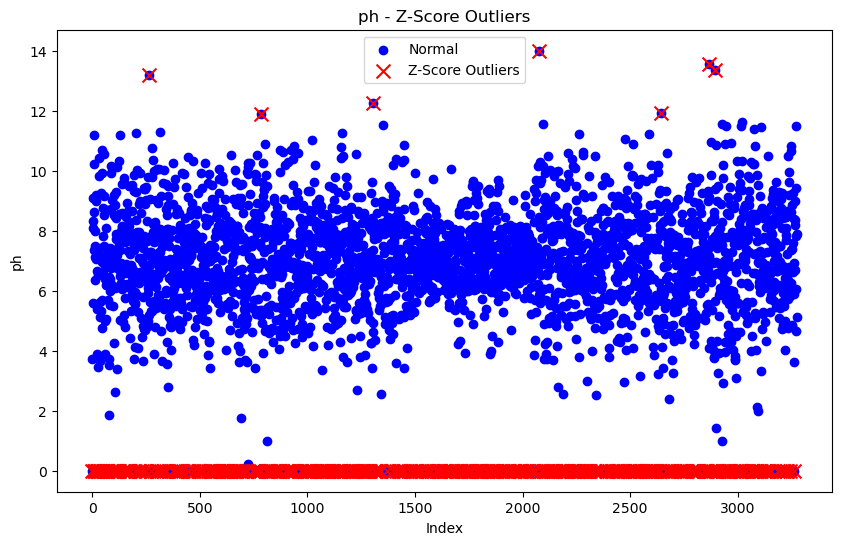

Z-score outliers:
0       0.0
8       0.0
13      0.0
20      0.0
22      0.0
       ... 
3224    0.0
3229    0.0
3231    0.0
3245    0.0
3260    0.0
Name: ph, Length: 499, dtype: float64


In [131]:
# Select a water quality parameter (e.g., 'ph')
parameter = 'ph'

# Calculate the Z-scores for the selected parameter
z_scores = np.abs(stats.zscore(data[parameter]))
z_threshold = 2

# Identify Z-score outliers
z_score_outliers = data[parameter][z_scores > z_threshold]

# Plot for Z-Score Outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data[parameter], c='b', label='Normal')
plt.scatter(z_score_outliers.index, z_score_outliers, c='r', label='Z-Score Outliers', marker='x', s=100)
plt.title(f'{parameter} - Z-Score Outliers')
plt.xlabel('Index')
plt.ylabel(parameter)
plt.legend()
plt.show()

print("Z-score outliers:")
print(z_score_outliers)

### 3) Inter Quartile Range(IQR)

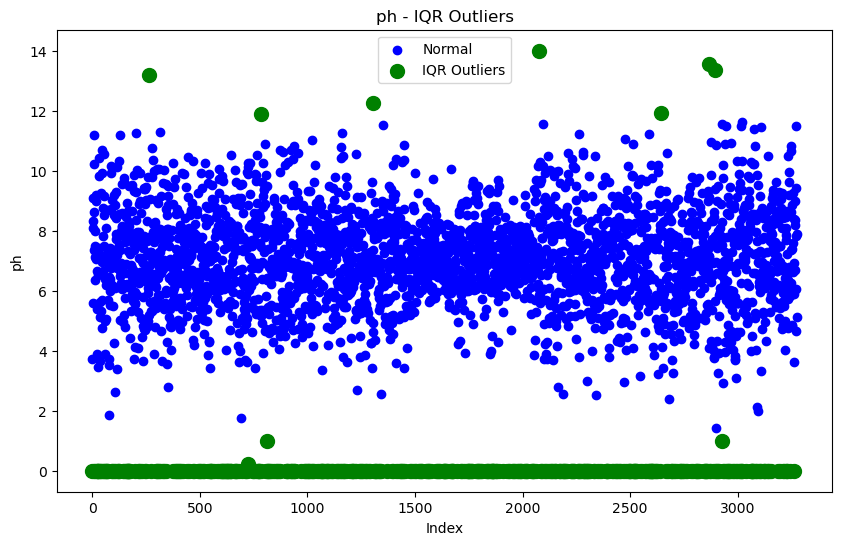

IQR outliers:
0       0.0
8       0.0
13      0.0
20      0.0
22      0.0
       ... 
3224    0.0
3229    0.0
3231    0.0
3245    0.0
3260    0.0
Name: ph, Length: 502, dtype: float64


In [132]:
# Select a water quality parameter (e.g., 'ph')
parameter = 'ph'

# Calculate the IQR for the selected parameter
Q1 = data[parameter].quantile(0.25)
Q3 = data[parameter].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection using IQR
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR

# Identify IQR outliers
iqr_outliers = data[parameter][(data[parameter] < iqr_lower_bound) | (data[parameter] > iqr_upper_bound)]

# Plot for IQR Outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data[parameter], c='b', label='Normal')
plt.scatter(iqr_outliers.index, iqr_outliers, c='g', label='IQR Outliers', marker='o', s=100)
plt.title(f'{parameter} - IQR Outliers')
plt.xlabel('Index')
plt.ylabel(parameter)
plt.legend()
plt.show()

print("IQR outliers:")
print(iqr_outliers)

### 4) Isolation Forest

C:\Users\Rojith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


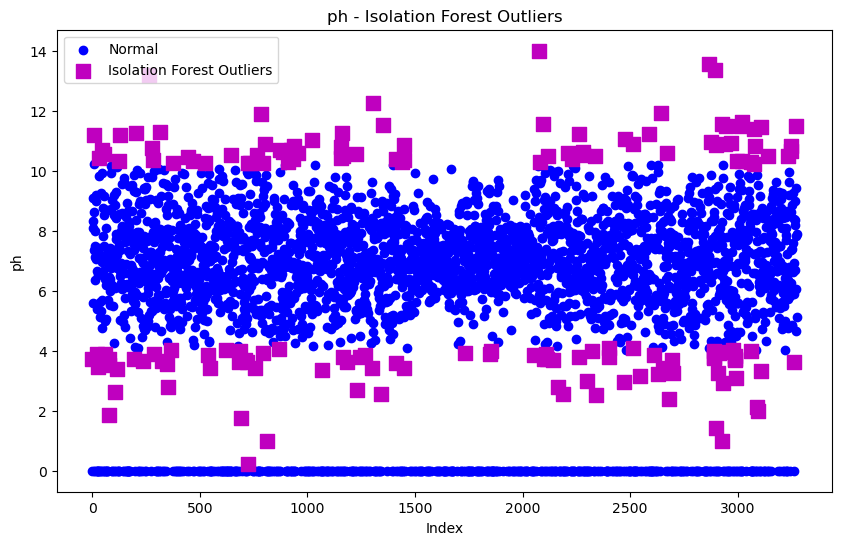

Isolation Forest outliers:
1        3.716080
9       11.180284
23       3.902476
26       3.445062
32      10.433291
          ...    
3233    10.485604
3246    10.667364
3249    10.808157
3261     3.629922
3269    11.491011
Name: ph, Length: 162, dtype: float64


In [133]:
# Select a water quality parameter (e.g., 'ph')
parameter = 'ph'

# Initialize the Isolation Forest model
clf = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
outliers_iforest = clf.fit_predict(data[[parameter]])

# Filter out Isolation Forest outliers
iforest_outliers = data[parameter][outliers_iforest == -1]

# Plot for Isolation Forest Outliers
plt.figure(figsize=(10, 6))
plt.scatter(data.index, data[parameter], c='b', label='Normal')
plt.scatter(iforest_outliers.index, iforest_outliers, c='m', label='Isolation Forest Outliers', marker='s', s=100)
plt.title(f'{parameter} - Isolation Forest Outliers')
plt.xlabel('Index')
plt.ylabel(parameter)
plt.legend()
plt.show()

print("Isolation Forest outliers:")
print(iforest_outliers)

### Conclusion:
Hence, Successfully explored and visualised various anolamy detection techniques considering one parameter 'ph'.